## step1: import lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### step2: read data using pandas

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/titanic.csv")
df.head(2)

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C

[2 rows x 12 columns]

In [3]:
df.shape

(891, 12)

In [4]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.isnull().sum()




PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
df.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

In [13]:
df.describe(include=['object'])

Name   Sex Ticket    Cabin Embarked
count                                    891   891    891      204      889
unique                                   891     2    681      147        3
top     Hogeboom, Mrs. John C (Anna Andrews)  male   1601  B96 B98        S
freq                                       1   577      7        4      644

### visualizing the missing values
----->sns.heatmap(df.isna())

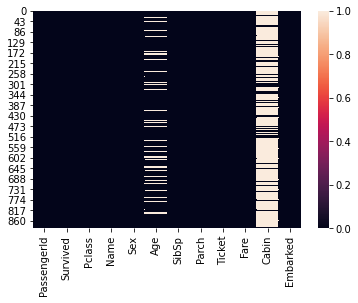

In [14]:
sns.heatmap(df.isna())

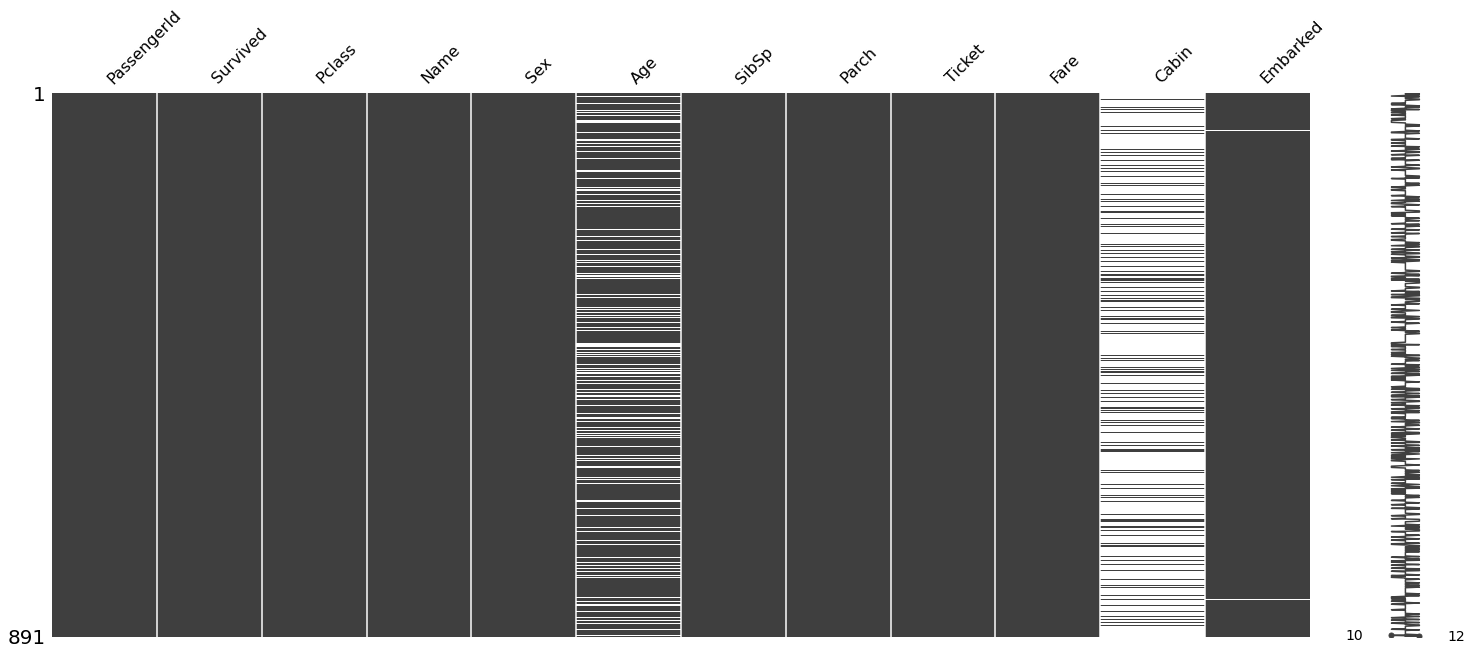

In [15]:
import missingno as msno
msno.matrix(df)

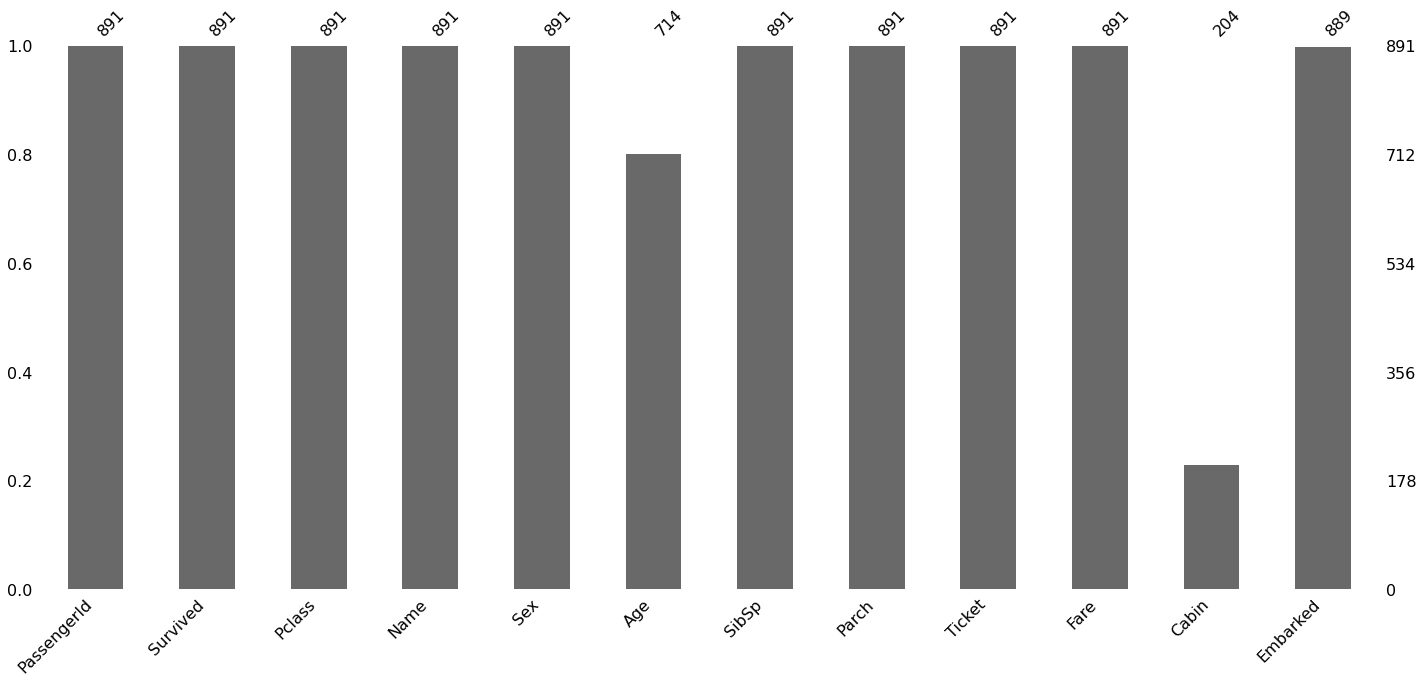

In [21]:
msno.bar(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a8a28a358>,
      dtype=object)

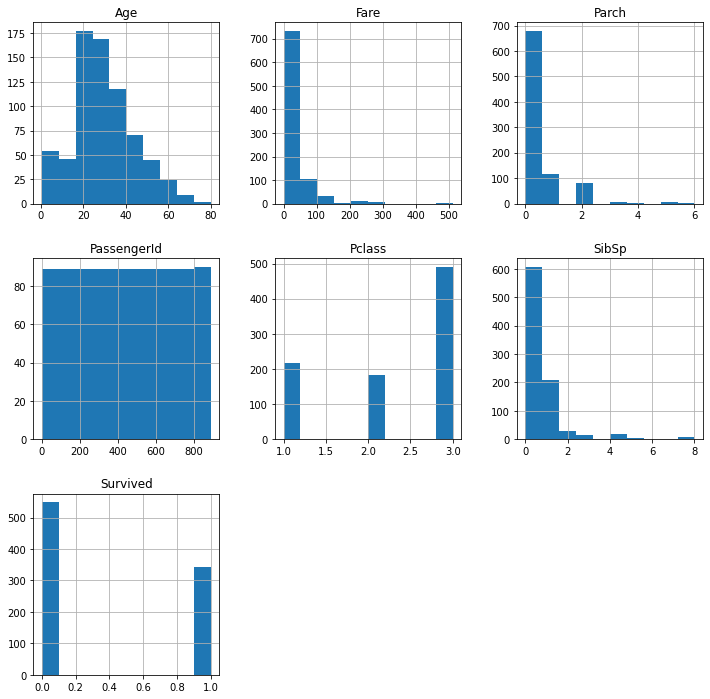

In [23]:
df.hist(figsize=(12,12))# works only for numericals

In [26]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [32]:
df.Survived.value_counts(normalize=True) # % of each category

0    0.616162
1    0.383838
Name: Survived, dtype: float64

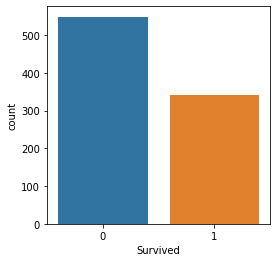

In [31]:
plt.figure(figsize=(4,4))
sns.countplot(df['Survived'])

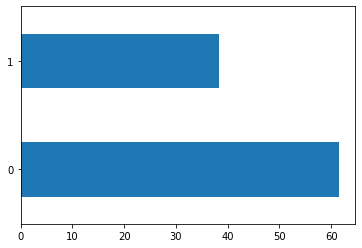

In [38]:
# horizontal bar chart
(df.Survived.value_counts(normalize = True)*100).plot.barh()


Text(0.5, 1.0, 'percentage of survived and diseased')

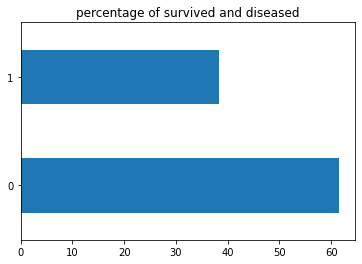

In [39]:
(df.Survived.value_counts(normalize=True)*100).plot.barh().set_title("percentage of survived and diseased")

In [40]:
# by seeing the plot ,we can observe that 60% of people have died

In [45]:
# how many male and female passengers survived from this target
df['Survived'][df['Sex']== 'female'].value_counts() ##1-->Survived 0-->deceased

1    233
0     81
Name: Survived, dtype: int64

In [42]:
df['Survived'][df['Sex']== 'male'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

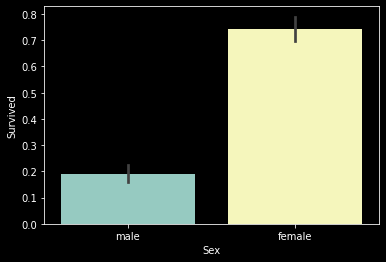

In [51]:
#plt.style.use('dark_backgroung')
with plt.style.context('dark_background'):
  sns.barplot(x='Sex', y='Survived',data =df)

In [53]:
df['Survived'][df['Pclass']==1].value_counts(normalize=True)

1    0.62963
0    0.37037
Name: Survived, dtype: float64

In [54]:
df['Survived'][df['Pclass']==2].value_counts(normalize=True)


0    0.527174
1    0.472826
Name: Survived, dtype: float64

In [55]:
df['Survived'][df['Pclass']==3].value_counts(normalize=True)


0    0.757637
1    0.242363
Name: Survived, dtype: float64

In [56]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

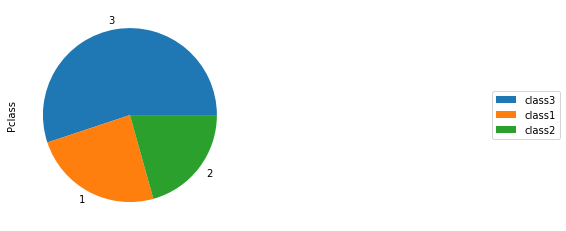

In [67]:
## plot of p class
df.Pclass.value_counts().plot.pie().legend(labels=['class3','class1','class2'],loc = 'center right',bbox_to_anchor=(2.5,0.5))

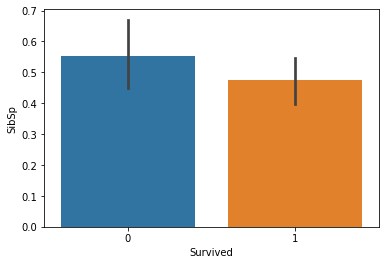

In [68]:
# sibsp:
sns.barplot(x='Survived', y='SibSp',data = df)

In [72]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

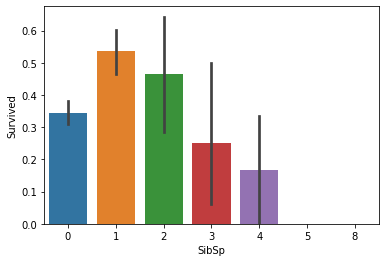

In [71]:
sns.barplot(x='SibSp',y ='Survived',data= df)

In [76]:
### Parch __> parent and child
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

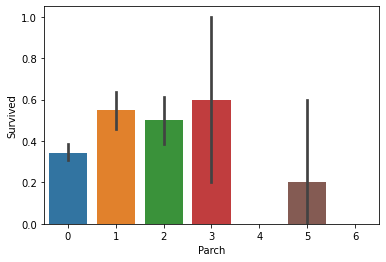

In [78]:
sns.barplot(x='Parch',y= 'Survived',data=df)

In [80]:
df.isnull().mean().sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

In [81]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [82]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [84]:
## grouping the ages of passengerss
df['Age-Range']=pd.cut(df.Age,[0,10,20,30,40,50,60,80])

In [86]:
df.head()

PassengerId  Survived  Pclass  ... Cabin Embarked  Age-Range
0            1         0       3  ...   NaN        S   (20, 30]
1            2         1       1  ...   C85        C   (30, 40]
2            3         1       3  ...   NaN        S   (20, 30]
3            4         1       1  ...  C123        S   (30, 40]
4            5         0       3  ...   NaN        S   (30, 40]

[5 rows x 13 columns]

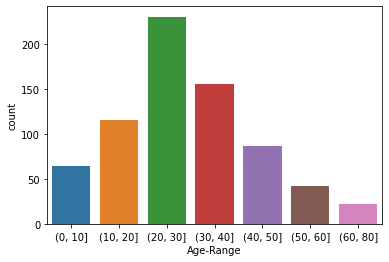

In [89]:
# lzing the age group of passengers who are more likely to survive
sns.countplot(x='Age-Range' , data =df)

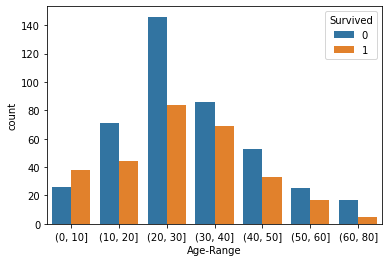

In [91]:
sns.countplot(x='Age-Range', hue='Survived',data = df)